In [14]:
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import warnings
sns.set(style="white")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
FIG_PATH="./figure/"
espl = pd.read_pickle("espl.pkl")
y = pd.read_pickle("y-2s.pkl")

In [16]:
print(y.unique())
print(espl.head())

['camminata' 'camminata_tasca' 'corsa' 'corsa_tasca' 'quotidiano' 'shake']
       intTrapz       maxA   MVDeriv      meanA
0  19482.697771  17.934078  0.001180   9.779379
1  20512.653253  19.667330  0.001624  10.317396
2  20261.991579  19.026058  0.001361  10.181171
3  21138.904614  19.894349  0.001560  10.624781
4  19421.826809  17.777913  0.001311   9.766651


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(espl, y, random_state=42)

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

DummyClassifier(strategy="stratified"): 24.1% di accuratezza


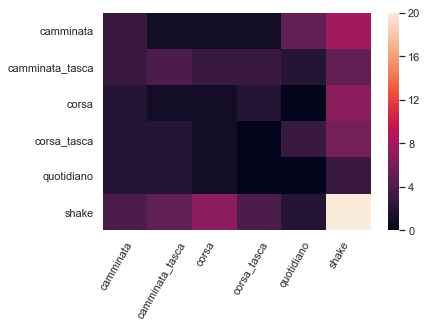

In [37]:
dc = DummyClassifier(strategy="stratified", random_state=42)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_val)

dummy_classifier_accuratezza = accuracy_score(y_val, y_pred)

print("DummyClassifier(strategy=\"stratified\"): {:.1f}% di accuratezza".format(100 * dummy_classifier_accuratezza))
sns.heatmap(confusion_matrix(y_val, y_pred), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.savefig(FIG_PATH+"confusionMatrix-Dummy.png", dpi=300, bbox_inches="tight")
plt.show()

LogisticRegression(multi_class="multinomial"): 60.3% di accuratezza


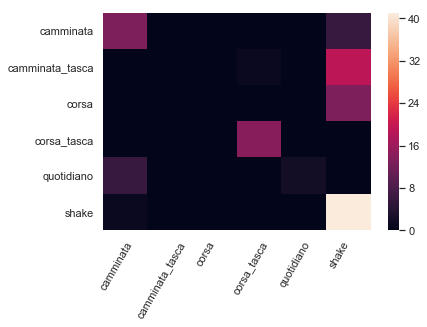

In [38]:
glmMult = LogisticRegression(penalty="l2", C=float("inf"), random_state=42, multi_class="multinomial", solver="lbfgs")
fit = glmMult.fit(X_train, y_train)
y_pred = fit.predict(X_val)

multinomial_accuratezza = accuracy_score(y_val, y_pred)
print("LogisticRegression(multi_class=\"multinomial\"): {:.1f}% di accuratezza".format(100 * multinomial_accuratezza))
sns.heatmap(confusion_matrix(y_val, y_pred), xticklabels=y.unique(), yticklabels=y.unique())
plt.xticks(np.arange(len(y.unique()))+0.3, y.unique(), rotation=60)
plt.savefig(FIG_PATH+"confusionMatrix-Mn.png", dpi=300, bbox_inches="tight")
plt.show()